<h1 style="color:#FF7C00  "> Autoencoders in TensorFlow 2 </h1>
<div style="margin-top: -30px;">
<span style="display: inline-block;">
    <h3 style="color: lightblue; display: inline;">Keywords:</h3>
    
</span>
</div> 

In [26]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Reshape
from tensorflow.keras.datasets import mnist

<h2 style="color:#FF7C00  "> Example #1  </h2>

In [27]:
input_shape = (28, 28, 1)
encoding_dim = 32

# Define the autoencoder model
input_img = layers.Input(shape=input_shape)
# Add an encoding layer with a smaller dimensionality than the input
x = layers.Flatten()(input_img)
encoded = layers.Dense(encoding_dim, activation='relu')(input_img)
# Add a decoding layer with the same dimensionality as the input
decoded = layers.Dense(784, activation='sigmoid')(encoded)

In [28]:
# Create the autoencoder model
autoencoder = models.Model(input_img, decoded)

# Compile the autoencoder with binary cross-entropy loss and Adam optimizer
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Print the summary of the autoencoder
autoencoder.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 dense_12 (Dense)            (None, 28, 28, 32)        64        
                                                                 
 dense_13 (Dense)            (None, 28, 28, 784)       25872     
                                                                 
Total params: 25936 (101.31 KB)
Trainable params: 25936 (101.31 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [33]:
input_shape = (28, 28, 1)
encoding_dim = 32

# Create a new Sequential model
autoencoder = Sequential()

# Add an input layer with the same shape as the data
autoencoder.add(Input(shape=input_shape))
# Add an encoding layer with a smaller dimensionality than the input
autoencoder.add(Dense(encoding_dim, activation='relu'))
# Add a decoding layer with the same dimensionality as the input
autoencoder.add(Dense(28 * 28 * 1, activation='sigmoid'))

In [34]:
# Compile the autoencoder with binary cross-entropy loss and Adam optimizer
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 28, 28, 32)        64        
                                                                 
 dense_17 (Dense)            (None, 28, 28, 784)       25872     
                                                                 
Total params: 25936 (101.31 KB)
Trainable params: 25936 (101.31 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


<h2 style="color:#FF7C00  "> Example #2 </h2>

In [35]:
""" Dummy dataset with 50 features"""
np.random.seed(10) 
x_train = np.random.rand(1000, 50) 
x_test = np.random.rand(200, 50)

input_shape = (50,)
encoding_dim = 32

# Encoder
input_data = layers.Input(shape=input_shape)
encoded = layers.Dense(encoding_dim, activation='relu')(input_data)
# Decoder
decoded = layers.Dense(50, activation='sigmoid')(encoded)
# Autoencoder Model
autoencoder = models.Model(input_data, decoded)
autoencoder.compile(optimizer='adam', loss='mean_squared_error')
autoencoder.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_10 (InputLayer)       [(None, 50)]              0         
                                                                 
 dense_18 (Dense)            (None, 32)                1632      
                                                                 
 dense_19 (Dense)            (None, 50)                1650      
                                                                 
Total params: 3282 (12.82 KB)
Trainable params: 3282 (12.82 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [36]:
# Training
autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=64,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/50
16/16 [==============================] - 1s 17ms/step - loss: 0.0878 - val_loss: 0.0847
Epoch 2/50
16/16 [==============================] - 0s 4ms/step - loss: 0.0837 - val_loss: 0.0829
Epoch 3/50
16/16 [==============================] - 0s 4ms/step - loss: 0.0824 - val_loss: 0.0820
Epoch 4/50
16/16 [==============================] - 0s 5ms/step - loss: 0.0813 - val_loss: 0.0811
Epoch 5/50
16/16 [==============================] - 0s 10ms/step - loss: 0.0800 - val_loss: 0.0798
Epoch 6/50
16/16 [==============================] - 0s 16ms/step - loss: 0.0783 - val_loss: 0.0782
Epoch 7/50
16/16 [==============================] - 0s 8ms/step - loss: 0.0764 - val_loss: 0.0763
Epoch 8/50
16/16 [==============================] - 0s 6ms/step - loss: 0.0745 - val_loss: 0.0745
Epoch 9/50
16/16 [==============================] - 0s 9ms/step - loss: 0.0726 - val_loss: 0.0726
Epoch 10/50
16/16 [==============================] - 0s 13ms/step - loss: 0.0709 - val_loss: 0.0710
Epoch 11/50
16/

<h2 style="color:#FF7C00  "> Example #3 </h2>

Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_16 (InputLayer)       [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 14, 14, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 7, 7, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_transpose_2 (Conv2D  (None, 7, 7, 64)          3692

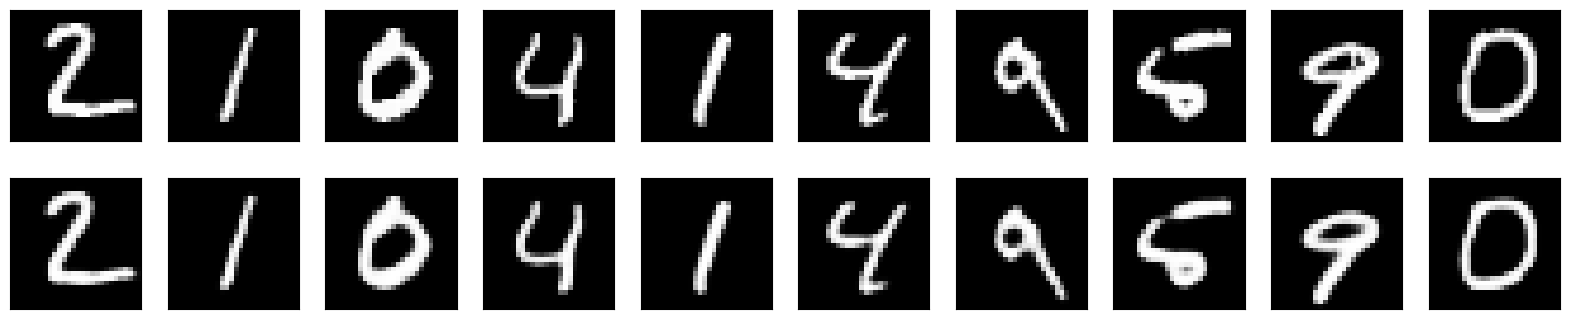

In [43]:
# Load and preprocess data
(x_train, _), (x_test, _) = mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))  
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))    

input_shape = (28, 28, 1)
encoding_dim = 64  # Feel free to adjust

# Encoder
input_img = layers.Input(shape=input_shape)
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(x)
encoded = layers.MaxPooling2D((2, 2), padding='same')(x)

# Decoder
x = layers.Conv2DTranspose(64, (3, 3), activation='relu', padding='same')(encoded)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2DTranspose(32, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)
decoded = layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

# Autoencoder Model
autoencoder = models.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.summary()

# Training
autoencoder.fit(x_train, x_train,
                epochs=10,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

# Predictions
decoded_imgs = autoencoder.predict(x_test)

# Visualization
n = 10
plt.figure(figsize=(20, 4))
for i in range(1, n + 1):
    # Display original
    ax = plt.subplot(2, n, i)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()


<h2 style="color:#FF7C00  "> Example #4 </h2>

In [42]:
# Create the model
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Input(shape=(784,)))
model.add(tf.keras.layers.Dense(512, activation='relu'))
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.Dense(32, activation='relu'))
model.add(tf.keras.layers.Dense(16, activation='relu'))
model.add(tf.keras.layers.Dense(8, activation='relu'))
model.add(tf.keras.layers.Dense(4, activation='relu'))
model.add(tf.keras.layers.Dense(2, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Create the dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
y_train = y_train.astype('float32')
y_test = y_test.astype('float32')

x_train = x_train.reshape(-1, 784)
x_test = x_test.reshape(-1, 784)

# Train the model
model.fit(x_train, y_train, epochs=10)

# Evaluate the model
model.evaluate(x_test, y_test)

Epoch 1/10
1875/1875 [==============================] - 31s 15ms/step - loss: -2.7901 - accuracy: 0.1125
Epoch 2/10
1875/1875 [==============================] - 30s 16ms/step - loss: -9.3337 - accuracy: 0.1124
Epoch 3/10
1875/1875 [==============================] - 25s 13ms/step - loss: -15.7014 - accuracy: 0.1124
Epoch 4/10
1875/1875 [==============================] - 26s 14ms/step - loss: -22.0883 - accuracy: 0.1124
Epoch 5/10
1875/1875 [==============================] - 29s 15ms/step - loss: -28.4962 - accuracy: 0.1124
Epoch 6/10
1875/1875 [==============================] - 30s 16ms/step - loss: -34.9049 - accuracy: 0.1124
Epoch 7/10
1875/1875 [==============================] - 30s 16ms/step - loss: -41.3056 - accuracy: 0.1124
Epoch 8/10
1875/1875 [==============================] - 30s 16ms/step - loss: -47.7038 - accuracy: 0.1124
Epoch 9/10
1875/1875 [==============================] - 36s 19ms/step - loss: -54.1121 - accuracy: 0.1124
Epoch 10/10
313/313 [===========================

[-63.5328483581543, 0.11349999904632568]